# Self Practice 2: Multilayer Perceptron using Numpy
© Machine Learning Summer School - Telkom University

---


<table  class="tfo-notebook-buttons" align="left"><tr><td>
    
<a href="https://colab.research.google.com/github/adf-telkomuniv/MLSS2020_Telkom/blob/master/practical%201/MLSS2020TU%20-%20Self%20Practice%202.ipynb" source="blank" ><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>
    
</td><td>
<a href="https://github.com/adf-telkomuniv/MLSS2020_Telkom/blob/master/practical%201/MLSS2020TU%20-%20Self%20Practice%202.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    
</td></tr></table>


In this exercise you will practice putting together a simple image classification pipeline, based on Neural Network classifier. 

The goals of this assignment are as follows:

1. understand the basic Multi-class Classification pipeline using Multilayer Perceptron
1. implement implement Deep Neural Network API






# [Part 0] Preparation



## 1 - Import Libraries

In [1]:
import numpy as np

from PIL import Image
import cv2 as cv
import h5py    

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

np.set_printoptions(precision=4)


## 2 - Helper Functions

---
# [Part 1] Neural Network

## Single Layer Perceptron
As we've seen in previous exercises, Single Layer Perceptron is essentially a Linear Classifier. With only one layer in the network, the architecture illustration is as described below


![onelayer](https://image.ibb.co/fjR3oz/onelayer.png) 


## Multi Layer Perceptron
We can further stacks the layers of neuron into a deeper architecture called Multi-Layer Perceptron (MLP). Layers located between input and output layer are called hidden layers.

MLP with 2 neuron layers called *2-Layer Neural Network* or *1-Hidden Neural Network*. The same apply for MLP with 3 layers called *3-Layer Neural Net* or *2-Hidden Neural Net*. Below are the illustration of 2-layer and 3-layer net 

*2-layer NN* | *3-layer NN*
- | -
![2layerNN](https://image.ibb.co/dHnnFe/2layerNN.png) | ![3layerNN](https://image.ibb.co/iH18MK/3layerNN.png)



---
## Backpropagation
You've also seen this in previous exercises, that in learning a Neural Network using Gradient Descent, there are several steps to be made:
* forward pass to multipy weights and input
* calculate error
* backward pass to get the input gradients and weights gradients

    
If we implement it in a simple python, the code for Single Layer Perceptron will need just several lines of code as follow:
```python
for epoch in range(max_epoch):
    
    layer = np.dot(feature, weight)
    activation = 1 / (1 + np.exp(-layer))    

    error = target - activation

    g_activation = (err) * (activation * (1 - activation))
    g_weight = feature.T.dot(layer)
    
    weight = weight + lr*g_bobot
```

You'll notice that to train Multi Layered Perceptron is essentially repeating the forward pass for each layer, continued by repeating reversely backward pass through each layer. 

We can implement each prward/backward pass for every specific architecture, but that will be too wastefull. Instead, we can build several API functions so that we can easily add or remove layers in an architecture.

---
# [Part 2] More Compact API
In the previous exercise you implemented a single layer perceptron on CIFAR-10. The implementation was simple but not very modular.

Implementing functional API to build and train Deep Neural Network is what have been done by popular Deep Learning Library and frameworks such as Keras, Tensorflow, and Torch

In this exercise we will implement a `forward` and a `backward` function for fully-connected networks using a more compact modular approach. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```




For this part, we've laready provide you the implementation of some basic layers

---
##1 - Affine API

Implement functions to compute the forward and backward pass foran affine (fully-connected) layer.

In [2]:
def affine_forward(x, W, b ):  
    """
    Inputs:
    - x : A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - W : A numpy array of weights, of shape (D, M)
    - b : A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out  : output, of shape (N, M)
    - cache: (x, w, b)
    """

    v = np.dot(x, W) + b    
    cache = (x, W, b)
    
    return v, cache

In [3]:
def affine_backward(dout, cache):
    """
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x : Input data, of shape (N, d_1, ... d_k)
      - w : Weights, of shape (D, M)
      - b : Biases, of shape (M,)

    Returns a tuple of:
    - dx  : Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw  : Gradient with respect to w, of shape (D, M)
    - db  : Gradient with respect to b, of shape (M,)
    """

    x, W, b = cache
    dW = np.dot(x.T,dout)
    db = np.sum(dout, axis=0, keepdims=True)
    dx = dout.dot(W.T)
    
    return dW, db, dx

##2 - ReLU API

Implement functions to compute the forward and backward pass for a layer of rectified linear units (ReLUs)

In [4]:
def relu_forward(x):
    """
    Input:
    - x : Inputs, of any shape

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: x
    """    

    out = x * (x > 0).astype(float)
    cache = x
    
    return out, cache

In [5]:
def relu_backward(dout, cache):
    """
    Input:
    - dout  : Upstream derivatives, of any shape
    - cache : Input x, of same shape as dout

    Returns:
    - dx : Gradient with respect to x
    """
  
    dx = dout * (cache >= 0)
    
    return dx

##3 - Softmax API

Implement function to compute the softmax score and function to compute the loss and gradient for softmax classification.

In [6]:
def softmax(x):  
    """
    Inputs:
    - x: Input data, of shape (N, C) 
         where x[i, j] is the score for the jth class for the ith input.

    Returns a tuple of:
    - score : softmax score, of shape (N, C) (normalize log-probability score)
    """
  
    x -= np.max(x)
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)  
    score = x_exp / x_sum
    
    return score

In [7]:
def softmax_loss(score, y):
    """
    Inputs:
    - score : softmax score, of shape (N, C)
    - y     : Vector of labels, of shape (N,) 
              where y[i] is the label for x[i] and 0 <= y[i] < C

    Returns a tuple of:
    - loss  : Scalar giving the loss
    - dx    : Gradient of the loss with respect to x
    """
   
    num_examples = score.shape[0]
    number_list = range(num_examples)
    corect_logprobs = -np.log(score[number_list,y])
    loss = np.sum(corect_logprobs)/num_examples
    
    dscores = score
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    
    return loss, dscores

---
#[Part 3] Deep Neural Net API

With the API implementation is sorted, we can now easily build the Neural Network. We'll create a Deep Neural Net API which will automatically create deep layers for a given list of hidden layer

With this, we can create however many layers in our architecture. To implement a one training epoch for Single Layer Perceptron, we just need to stack these functions

<pre><font color='green'>affine_fwd</font> -> 
    <font color='blue'>sigmoid_fwd</font> ->
        <font color='red'>calculate_loss</font> ->
    <font color='blue'>sigmoid_bwd</font> -> 
<font color='green'>affine_bwd</font> -> 
weights_update</pre>

---
Then, to build a 2 Layer Neural Net (1 hidden layer), we only need to add several functions 
<pre><font color='green'>affine_fwd</font> -> 
    <font color='blue'>sigmoid_fwd</font> ->
        <font color='green'>affine_fwd</font> -> 
            <font color='blue'>sigmoid_fwd</font> ->
                <font color='red'>calculate_loss</font> ->
            <font color='blue'>sigmoid_bwd</font> -> 
        <font color='green'>affine_bwd</font> -> 
    <font color='blue'>sigmoid_bwd</font> -> 
<font color='green'>affine_bwd</font> -> 
weights_update</pre>

Let's try it

---
## 1 - Weight Init
Below is a function to repeatedly initialize weights and bias for each layer

In [8]:
def init_weights(d_in, hidden, d_out, std=1e-2, seed=None):
    """
    Inputs:
    - d_in  : int, number of input dimension
    - hidden: list of number hidden neuron in each hiidden layer
    - d_out : int, number of output dimension
    - std   : standar deviation for generating weights
    - seed  : random seed
    
    Outputs:
    - W: list of Weights
    - b: list of biases
    """
    
    W = []
    b = []
    np.random.seed(seed)
    dims = [d_in] + hidden + [d_out] 
    
    for i in range(len(dims)-1):
        W.append(std * np.random.randn(dims[i],dims[i+1]))
        b.append(np.zeros((1, dims[i+1])))
    return W, b

---
## 2 - Predict Function

Implement the predict function first, because we are going to use **predict** function inside the **training** function to track the **validation** accuracy 

<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC Layer - activation]</font> - FC Layer - argmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




#### <font color='red'>**EXERCISE**: </font>
**Implement Predict Function**

    * loop call forward function for each hidden layer weights
    * check and use the requested activation funtion
    * call forward function for the last layer

In [9]:
def predict_multi_layer(X, W, b):    
    """
    Inputs:
    - X    : Input data, of shape(N, D)
    - W    : list of Weight
    - b    : list of biases
    
    Output:
    - y_pred : list of class prediction
    """
    y_pred = np.zeros(X.shape[1])
    n_layer = len(W)
    
    # first activation is X
    act = X
    
    ## ------------------------- start your code here -------------------------
    
    # loop i over n_layer-1
    for i in range(n_layer-1):
    
        # calculate layer score by calling affine forward function using act, W[i], and b[i]
        layer, _ = affine_forward(act, W[i], b[i])
  
        # calculate activation score by calling relu forward function using layer score
        act, _ = relu_forward(layer)
          

    # calculate last layer score by calling affine forward function using act, W[-1], and b[-1]
    last_layer, _ = affine_forward(act, W[-1], b[-1])
    
    
    # take the maximum prediction from the last layer and use that column to get the class       
    # use np.argmax with axis=-1 
    y_pred = np.argmax(last_layer, axis=-1)

    ## ------------------------- end your code here -------------------------
    
    return y_pred

---
## 3 - Training Function

Now let's complete the training function


<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC Layer - activation]</font> - FC Layer - Softmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




<br>

#### <font color='red'>**EXERCISE**: </font>
**Implement Training Function**

there are **four steps** in this training function

---

**1. Forward Pass**

    * loop over hidden layer [for len(W)-1]
        * call affine forward function
        * call activation forward function
    * call affine forward function for the last layer
    * call softmax score function

**2. Calculate Loss**

    * call softmax_loss function
    * loop over weights [for W]
        * calculate loss with regularization


**3. Backward Pass**

    * call affine backward function for the last layer
    * loop over hidden layer [from len(W)-2 to 0]
        * call activation backward function
        * call affine backward function

**4. Weight Update**

    * loop over weights [for W]
        * implement weight update
    * calculate the training and validation accuracy

In [10]:
def train_multi_layer(X, y, X_val, y_val, hidden_size, 
                      W=None, b=None, std=1e-4, seed=None,
                      lr=1e-4, lr_decay=0.95, reg=0.25, 
                      epochs=100, batch_size=200, verbose=True):
    """
    Inputs:
    - X          : array of train data, of shape (N, D)
    - y          : array of train labels, of shape (N,)
    - X_val      : array of validation data, of shape (Nv, D)
    - y_val      : array of validation labels, of shape (Nv,)
    - hidden_size: list of hidden neuron for each hidden layer
    - W          : list of Weight, if W is None, it will be initialized
    - b          : list of biases, if W is None, bias will be initialized
    - std        : float, standar deviation for generating weights
    - seed       : int, initial random seed
    - lr         : float, initial learning rate
    - lr_decay   : float, 0-1, decay rate to reduce learning rate each epoch
    - reg        : float, regularization rate
    - epochs     : int, number of training epoch
    - batch_size : int, number of batch used each step
    - verbose    : boolean, verbosity
    
    Outputs:
    - W          : list of trained Weights
    - b          : list of trained biases
    - history    : list of training history [loss, train_acc, val_acc]
    
    """
    
    num_train, dim = X.shape
    
    
    # check if data train is divisible by batch size
    assert num_train % batch_size==0, "data train "+str(num_train)+" is not divisible by batch size"+str(batch_size)
    
    # total iteration per epoch
    num_iter = num_train // batch_size
    
    #start iteration counts
    it = 0
    
    # assume y takes values 0...K-1 where K is number of classes
    num_classes = np.max(y) + 1  
        
    # initialize Weights
    if W is None:
        W, b = init_weights(dim, hidden_size, num_classes, std, seed) 
        
    # number of layer (including output layer)
    n_layer = len(W)

    # Run stochastic gradient descent to optimize W
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    ## ------------------------- start your code here -------------------------

    print('start training')
    for ep in range(epochs):

        # Shuffle data train index
        train_rows = np.arange(num_train)
        np.random.shuffle(train_rows)
        
        # split index into mini batches
        id_batch = np.split(train_rows, num_iter)
  
        for batch in id_batch:
      
            X_batch = X[batch]
            y_batch = y[batch]

            # store all cache in dictionary
            cache = {}

            # first layer activation input is X_batch
            act = X_batch

            # ------------------------------------------------
            # 1. Forward Pass
            # ------------------------------------------------

            # loop i over hidden layer (n_layer-1)
            # see predict function implementation
            for i in range(n_layer-1):

                # calculate layer score by calling affine forward function using activation act, W[i], and b[i]
                layer, cache_affine = affine_forward(act, W[i], b[i])

                # calculate activation score by calling relu forward function using layer score
                act, cache_act = relu_forward(layer)

                # combine cache from affine and activation layer into cache for this layer
                cache[i] = (cache_affine, cache_act)

            # calculate last layer score by calling affine forward function using activation act, W[i+1], and b[i+1]
            last_layer, cache[i+1] = affine_forward(act, W[i+1], b[i+1])

            # calculate softmax score by calling softmax function using last_layer score
            softmax_score = softmax(last_layer)

            # ------------------------------------------------
            # 2. Calculate Loss
            # ------------------------------------------------

            # evaluate loss and gradient by calling softmax_loss function using input softmax_score and y_batch
            loss, dout = softmax_loss(softmax_score, y_batch)

            # add regularization to the loss:
            #  for each weights, calculate the sum square, multiply regularization strength
            #  then add it to the loss
            for w in W:
                loss += reg * np.sum(w*w)

            # append the loss history
            loss_history.append(loss)


            # ------------------------------------------------
            # 3. Backward Pass
            # ------------------------------------------------    

            # dictionary to contain all gradients
            dW = {}
            db = {}

            # calculate last weights gradient by calling affine backward function using dout and cache[n_layer-1]
            dW[n_layer-1], db[n_layer-1], dact = affine_backward(dout, cache[n_layer-1])

            #loop i from n_layer-2 down to 0
            for i in range(n_layer-2,-1,-1):

                # extract affine cache and activation cache from layer cache
                cache_affine, cache_act = cache[i]

                # calculate relu gradient by calling relu backward function using dact and cache_act score
                dlayer = relu_backward(dact, cache_act)

                # calculate layer weights gradient by calling affine backward function using dlayer and cache_affine
                dW[i], db[i], dact = affine_backward(dlayer, cache_affine)

                # add regularization to gradient
                dW[i] += 2 * reg * W[i]

            # ------------------------------------------------
            # 4. Weight Update
            # ------------------------------------------------    

            # perform parameter update by subtracting W[i] and b[i] for each layer with a fraction of dW[i] and db[i]
            # according to the learning rate
            for i in range(len(W)):    
                W[i] -= lr * dW[i]
                b[i] -= lr * db[i]

            # iteration count
            it +=1

            if verbose and it % 100 == 0:
                print ('iteration',it,'(epoch', ep,'/',epochs, '): loss =', loss)
              
            
        # At the end of one epoch
        # 1. Check accuracy
        #    calculate the training accuracy by calling predict_multi_layer function on X_batch
        #    and compare it to y_batch. Then calculate the mean correct (accuracy in range 0-1)
        train_acc = (predict_multi_layer(X_batch, W, b) == y_batch).mean()
        train_acc_history.append(train_acc)

        # 2. Calculate the training accuracy by calling predict_multi_layer function on X_val
        #    and compare it tu y_val. Then calculate the mean correct (accuracy in range 0-1)
        val_acc = (predict_multi_layer(X_val, W, b) == y_val).mean()
        val_acc_history.append(val_acc)

        # 3. Decay learning rate
        #    multiply learning rate with decay
        lr *= lr_decay
            
            
    ## ------------------------- end your code here -------------------------
    
    history = [loss_history, train_acc_history, val_acc_history]
    
    if verbose:
      print('Training done')
    
    return W, b, history

---
# [Part 4] CIFAR-10 Dataset

Here, we'll use the CIFAR-10 dataset

for that, let's load and preprocess it first

---
## 1 - Load CIFAR-10

In [11]:
import tensorflow as tf

(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170500096/170498071 [==============================] - 2s 0us/step


---
## 2 - Visualizing Data



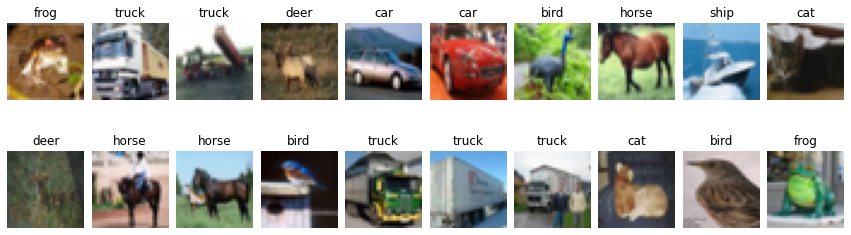

In [12]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
label = y_train.ravel()
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train_ori[i+j*10])
        ax[j,i].set_title(class_names[label[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
## 3 - Split Validation Data

In [13]:
X_val_ori   = X_train_ori[-10000:,:]
y_val       = y_train[-10000:]

X_train_ori = X_train_ori[:-10000, :]
y_train     = y_train[:-10000]

---
## 4 - Normalize and Reshape Data

In [14]:
X_train  = X_train_ori.astype('float32')
X_val    = X_val_ori.astype('float32')
X_test   = X_test_ori.astype('float32')

mean_image = np.mean(X_train, axis = 0)

X_train -= mean_image
X_val   -= mean_image
X_test  -= mean_image

# X_train  = X_train.reshape(( number_training_data , 32*32*3))
X_train  = X_train.reshape(( X_train.shape[0] , X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_val    = X_val.reshape((X_val.shape[0],X_val.shape[1]*X_val.shape[2]*X_val.shape[3]))
X_test   = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train  = y_train.ravel()
y_val    = y_val.ravel()
y_test   = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (40000, 3072)
X_val.shape   = (10000, 3072)
X_test.shape  = (10000, 3072)

y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


---
#[Part 5] Deep Neural Network
* In this part, we'll increase the network capacity by increasing the number of hidden layers
 
* Like before, we'll try both **tanh** and **relu** activation function, then compare the results
 
* And since we're using more layers, we'll train it a little bit longer

---
##1 - Train Network

In [15]:
hidden_size=[50, 50]

W, b, history = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    std=1e-2, lr=1e-2,
    lr_decay=0.95, reg=0.01, 
    epochs=20)


start training
iteration 100 (epoch 0 / 20 ): loss = 1.9981117761669123
iteration 200 (epoch 0 / 20 ): loss = 1.8246379155359378
iteration 300 (epoch 1 / 20 ): loss = 1.7982232609272515
iteration 400 (epoch 1 / 20 ): loss = 1.7025010097360598
iteration 500 (epoch 2 / 20 ): loss = 1.7647172586279036
iteration 600 (epoch 2 / 20 ): loss = 1.5723850063776157
iteration 700 (epoch 3 / 20 ): loss = 1.6814658286299586
iteration 800 (epoch 3 / 20 ): loss = 1.7008143026357747
iteration 900 (epoch 4 / 20 ): loss = 1.5435745160999697
iteration 1000 (epoch 4 / 20 ): loss = 1.601531743337841
iteration 1100 (epoch 5 / 20 ): loss = 1.471203880434395
iteration 1200 (epoch 5 / 20 ): loss = 1.476361733938614
iteration 1300 (epoch 6 / 20 ): loss = 1.3449919849779868
iteration 1400 (epoch 6 / 20 ): loss = 1.5700631210497542
iteration 1500 (epoch 7 / 20 ): loss = 1.4030076887082163
iteration 1600 (epoch 7 / 20 ): loss = 1.5705758055524002
iteration 1700 (epoch 8 / 20 ): loss = 1.4679083236399981
iteration 1

---
##2 - Visualize Training
Visualize the loss, and train-validation accuracy

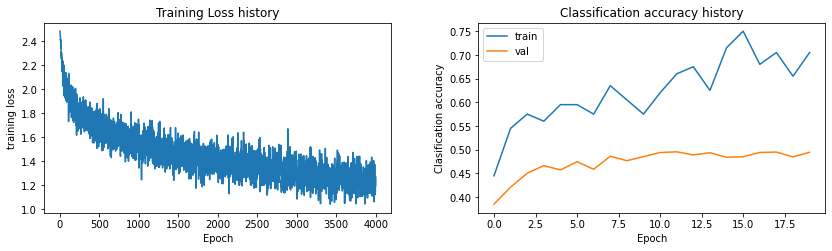

In [16]:
loss, train_acc, val_acc = history

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

---
##3 - Training Accuracy
Calculate the loss, and train-validation accuracy

In [17]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W, b)
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy = %0.2f%%' %  (accuracy*100))

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 62.03%
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [6 1 9 6 8 1 2 7 8 7 6 7 7 9 9]


In [18]:
y_pred = predict_multi_layer(X_val, W, b)
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy = %0.2f%%' %  (accuracy*100))

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 49.45%
Validation label = [1 8 5 1 5 7 4 3 8 2 7 2 0 1 5]
Predicted label  = [9 8 3 0 4 7 6 1 8 8 2 3 0 0 5]


In [19]:
y_pred = predict_multi_layer(X_test, W, b)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Testing Accuracy = %0.2f%%' %  (accuracy*100))

print('Testing label    =',y_test[:15])
print('Predicted label  =',y_pred[:15])

Testing Accuracy = 49.34%
Testing label    = [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]
Predicted label  = [6 8 8 2 4 6 1 6 3 1 0 9 6 0 9]


---
## 4 - View Result
Now to visualise some of the model's predictions:

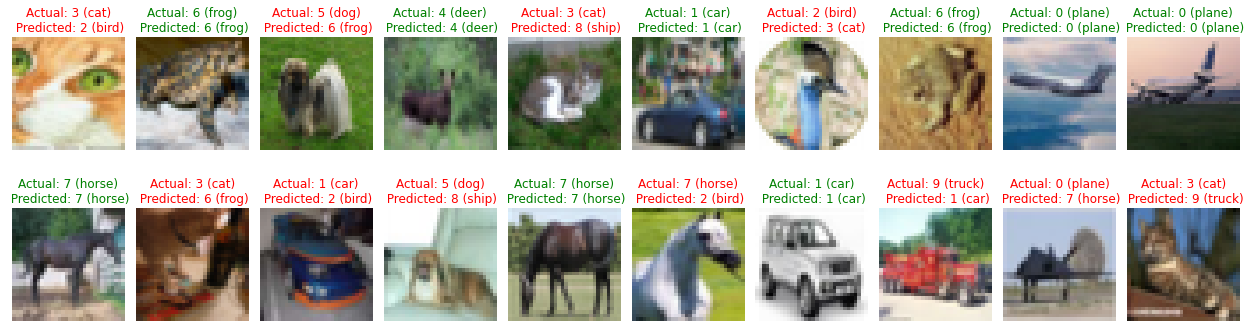

In [20]:
fig, ax = plt.subplots(2,10,figsize=(22,6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for j in range(0,2):
    for i in range(0, 10):

        img_index = np.random.randint(0, 10000)
        ax[j,i].imshow(X_test_ori[img_index])

        actual_label    = int(y_test[img_index])
        predicted_label = int(y_pred[img_index])

        color = 'red'
        if actual_label == predicted_label:
            color = 'green'

        ax[j,i].set_title("Actual: {} ({})\n Predicted: {} ({})".format(
            actual_label, class_names[actual_label], predicted_label, class_names[predicted_label]
            ), color=color)
        ax[j,i].axis('off')
plt.show()

---

# Congratulation

<font size=5> You've Completed Self-Practice 2</font>

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>